In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate data [x1, x2] -> 0/1, where 0 <= x < 1
def gen_data(size, noise):
    X = np.random.rand(size, 2)
    # divider: y = -x + 1 + gaussian noise
    y = 1 * (X[:,1] + X[:,0] - 1. + np.random.normal(0, noise, size) > 0)
    y.shape = (size, 1)
    return X, y

def plot(X, y, A=None):
    fig, ax = plt.subplots()
    ax.scatter(X[y[:,0]==0,0], X[y[:,0]==0,1], c='blue')
    ax.scatter(X[y[:,0]==1,0], X[y[:,0]==1,1], c='red')
    if A is not None:
        line_x = np.linspace(0, 1, 10)
        line_y = -(line_x * A[0] + A[2]) / A[1]
        ax.plot(line_x, line_y, 'y', linewidth=5.0)
    ax.grid(True)
    plt.show()



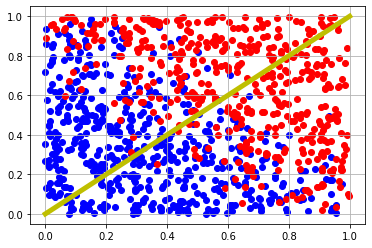

In [3]:
X, y = gen_data(1000, 0.2)
X = np.append(X, np.ones((1000, 1)), axis=1) # pad 1 to features
A = np.array([-1., 1., 0.]).reshape((3, 1)) # init weights

plot(X, y, A)

In [4]:
def sigmoid(x):
    return (1. + np.exp(-x)) ** -1

def predict(x, A):
    return 1 * (sigmoid(np.matmul(x, A)) > 0.5)

def accuracy(x, y, A):
    return sum(np.equal(predict(x, A), y)) / float(len(y))

print(accuracy(X, y, A))

[0.506]


1000 [[ 2.79650336]
 [ 3.03785142]
 [-2.90977636]] [0.866]


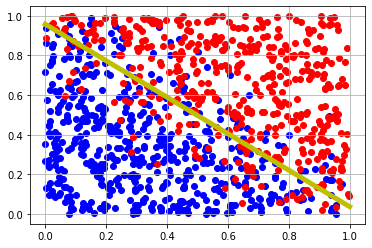

In [5]:
#d(Loss)/daj = sum(xi * (sigmoid(aj*xi) - yi)) / #x
step = 0.1
max_iter = 1000
curr_iter = 0
while curr_iter < max_iter:
    gradient = sum(X * (sigmoid(np.matmul(X, A)) - y)).reshape(3, 1) / float(len(y))
    A -= step * gradient
    curr_iter += 1

print(curr_iter, A, accuracy(X, y, A))
plot(X, y, A)